# Maestría en Inteligencia Artificial Aplicada

## Curso: Inteligencia Artificial y Aprendizaje Automático

### Tecnológico de Monterrey

### Prof Luis Eduardo Falcón Morales

## Adtividad de las Semanas 5 y 6
### **Problema de asignación de créditos: South German Dataset.**


#### **Nombres y matrículas:**

+ Eduardo Selim Martínez Mayorga - A01795167
+ Víctor Alfonso Rosales Soto - A01114509

# **Parte I: Partición, análisis y pre-procesamiento de los datos.**

## **Ejercicio 1**

In [51]:
# Aquí deberás incluir todas las librerías que requieras durante esta actividad:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.api.types import CategoricalDtype

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline, FeatureUnion



from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate

from sklearn import metrics

from pandas.plotting import scatter_matrix
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score


from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectFromModel


In [52]:
# Si se desean comentar algunos de los Warnings.
#import warnings
#warnings.filterwarnings('ignore')

Descarga los datos, los cuales nos llevan a un arreglo de 1000 registros y 21 variables. Cambia los títulos de las columnas al nombre en inglés (originalmente están en alemán). La información la puedes encontrar en cualquiera de las ligas

+ https://www.kaggle.com/competitions/south-german-credit-prediction/overview
+ https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=9239944

In [53]:
# Carga y renombra los nombres de las columnas del alemán al inglés y desplegamos
# de nuevo el DataFrame para ver el resultado obtenido:

# ************* Inlcuye aquí tu código:*****************************
None   # NOTA: Tanto aquí como en lo sucesivo, "None" puede indicar una o varias líneas de código.

# Se lee el archivo que se obtuvo de la página de UC Irvine
df = pd.read_csv('SouthGermanCredit.asc', delim_whitespace=True)

# Veamos los nombres de las columnas del dataframe original
df.columns

Index(['laufkont', 'laufzeit', 'moral', 'verw', 'hoehe', 'sparkont', 'beszeit',
       'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'alter', 'weitkred',
       'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb', 'kredit'],
      dtype='object')

In [54]:
# Se define un diccionario que relaciona los nombres en aleman e inglés
dicc_nombres = {'laufkont': 'status',
                'laufzeit': 'duration',
                'moral': 'credit_history',
                'verw': 'purpose',
                'hoehe': 'amount',
                'sparkont': 'savings',
                'beszeit': 'employment_duration',
                'rate': 'installment_rate',
                'famges': 'personal_status_sex',
                'buerge': 'other_debtors',
                'wohnzeit': 'present_residence',
                'verm': 'property',
                'alter': 'age',
                'weitkred': 'other_installment_plans',
                'wohn': 'housing',
                'bishkred': 'number_credits',
                'beruf': 'job',
                'pers': 'people_liable',
                'telef': 'telephone',
                'gastarb': 'foreign_worker',
                'kredit': 'credit_risk'
            }
 
# Se renombrea las columnas en el DataFrame usando el diccionario
df.rename(columns = dicc_nombres, inplace=True)

# *********** Aquí termina la sección de agregar código *************

df.head().T

,0,1,2,3,4
status,1,1,2,1,1
duration,18,9,12,12,12
credit_history,4,4,2,4,4
purpose,2,0,9,0,0
amount,1049,2799,841,2122,2171
savings,1,1,2,1,1
employment_duration,2,3,4,3,3
installment_rate,4,2,2,3,4
personal_status_sex,2,3,2,3,3
other_debtors,1,1,1,1,1


## **Ejercicio 2**

Contrario a lo que sucede en analítica de datos, la clase mayoritaria de los buenos clientes están etiquetados con el valor de 1 y los malos clientes con el valor de 0. Como este no es el proceder dentro del área de ciencia de datos, aplica alguna transformación para invertir dichos valores, de manera que en lo sucesivo la clase negativa y mayoritaria de los buenos clientes estén etiquetados con el valor de 0 y los malos clientes o clase positiva y minoritaria, estén etiquetados con el valor de 1.

In [55]:
# Los datos originales tienen en la variable de salida "credit_risk" a la clase negativa (buen cliente) con el valor de 1
# y a la clase de interés positiva (mal cliente) con el valor de 0. Realiza a continuación una transformación para que la
# clase negativa (buen cliente) quede ahora con el valor de 0 y la clase positiva (mal cliente) quede con el valor de 1.

# Veamos los datos originales
print(df['credit_risk'].value_counts())

1    700
0    300
Name: credit_risk, dtype: int64


Ahora se hará el cambio de etiquetas simplemente aplicando una función que convierta al '0' en '1' y al resto en '0':

In [56]:
# ************* Inlcuye aquí tu código:*****************************

# Simplemente se aplica una fución lambda
df['credit_risk'] = df['credit_risk'].apply(lambda x: 1 if x == 0 else 0)


# *********** Aquí termina la sección de agregar código *************

print(df['credit_risk'].value_counts())

0    700
1    300
Name: credit_risk, dtype: int64


Se puede observar que las etiquetas de clase se intercambiaron :)

## **Ejercicio 3**

Realiza una partición de los datos en los conjuntos de entrenamiento, validación y prueba, del 70%, 15% y 15%, respectivamente. Con base al porcentaje de los niveles de la variable de salida ¿podemos decir que tenemos un problema de datos desbalanceado? ¿Por qué?

In [57]:
# Realiza una partición de 70-15-15 en entrenamiento, validación y prueba.
# Los nombres de los conjuntos deberán ser como se indican en los print de abajo:

# ************* Inlcuye aquí tu código:*****************************

# Se consruye el dataset de las POSIBLES variables predictoras
X = df.drop('credit_risk', axis = 1)

# Se consruye el dataset de la variable de salida
y = df['credit_risk']

# Particionamos 70% Train y 30% una temporal para volverla a dividir, para los datos de entrada y de salida, respectivamente, garantizando
# que dicha partición conserve la estratificación de las clases de la variable respuesta
Xtrain, Xtemp, ytrain, ytemp = train_test_split(X, y,
                                                train_size = 0.7,
                                                random_state = 1,
                                                stratify = y)

#Particionamos el 30% en 50% validación y 50% en test.
Xval, Xtest, yval, ytest = train_test_split(Xtemp, ytemp,
                                            train_size = 0.5,
                                            random_state = 1,
                                            stratify = ytemp)


# *********** Aquí termina la sección de agregar código *************


# Mostremos las dimensiones de la partición generada:
print("Dimensiones:")
print("Entrenamiento:", Xtrain.shape, ytrain.shape)
print("Validación:", Xval.shape, yval.shape)
print("Prueba:", Xtest.shape, ytest.shape)

# Y el porcentaje de cada clase de la variable de salida:
tmp = ytrain.sum()/ytrain.shape[0]
print("\nPorcentaje clases Positiva:%.2f%%, y Negativa:%.2f%%" % (100*(1-tmp),tmp*100))


Dimensiones:
Entrenamiento: (700, 20) (700,)
Validación: (150, 20) (150,)
Prueba: (150, 20) (150,)

Porcentaje clases Positiva:70.00%, y Negativa:30.00%


### **Con base al porcentaje de los niveles de la variable de salida ¿podemos decir que tenemos un problema de datos desbalanceado? ¿Por qué?**

Observemos la proporción de '1' en el dataset original:

In [58]:
df['credit_risk'].value_counts()/len(df['credit_risk'])

0    0.7
1    0.3
Name: credit_risk, dtype: float64

Verificamos la proporción de '1' en el dataset de entrenamiento:

In [59]:
ytrain.value_counts()/len(ytrain)

0    0.7
1    0.3
Name: credit_risk, dtype: float64

Verificamos la proporción de '1' en el dataset de validación:

In [60]:
yval.value_counts()/len(yval)

0    0.7
1    0.3
Name: credit_risk, dtype: float64

Verificamos la proporción de '1' en el dataset de prueba:

In [61]:
ytest.value_counts()/len(ytest)

0    0.7
1    0.3
Name: credit_risk, dtype: float64

### ++++++++ Inicia la sección de agregar texto: +++++++++++

Considerando la proporción de las respuestas, 70% tiene etiqueta 0, y 30% etiqueta 1; y usando como referencia que para que una clase se considere desbalanceada debe al menos tener la distribución 80/20, entonces **SÍ** se considera que este conjunto de datos tienen datos desbalanceados.

### ++++++++ Termina la sección de agregar texto: +++++++++++

## **Ejercicio 4**

El tipo de variable en que se puede clasificar un factor depende en ocasiones del tratamiento que le da el analista. En nuestro caso, siguiendo la información dada en las referencias de la base de datos South-German-Credit, las clasificamos de acuerdo a como se indica a continuación. A partir de las referencias dadas y de la información que puedas obtener de los datos, indica el significado de cada una de las 21 variables. En particular, para todas las variables categóricas deberás indicar el número de niveles que tiene cada una.

Primero veamos cómo están codificadas las variables del dataset:

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   1000 non-null   int64
 1   duration                 1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   amount                   1000 non-null   int64
 5   savings                  1000 non-null   int64
 6   employment_duration      1000 non-null   int64
 7   installment_rate         1000 non-null   int64
 8   personal_status_sex      1000 non-null   int64
 9   other_debtors            1000 non-null   int64
 10  present_residence        1000 non-null   int64
 11  property                 1000 non-null   int64
 12  age                      1000 non-null   int64
 13  other_installment_plans  1000 non-null   int64
 14  housing                  1000 non-null   int64
 15  numbe

Se puede observar que todas están codificadas como números enteros. Dado que están codificados como valores numéricos, veamos cómo se ven sus histogramas:

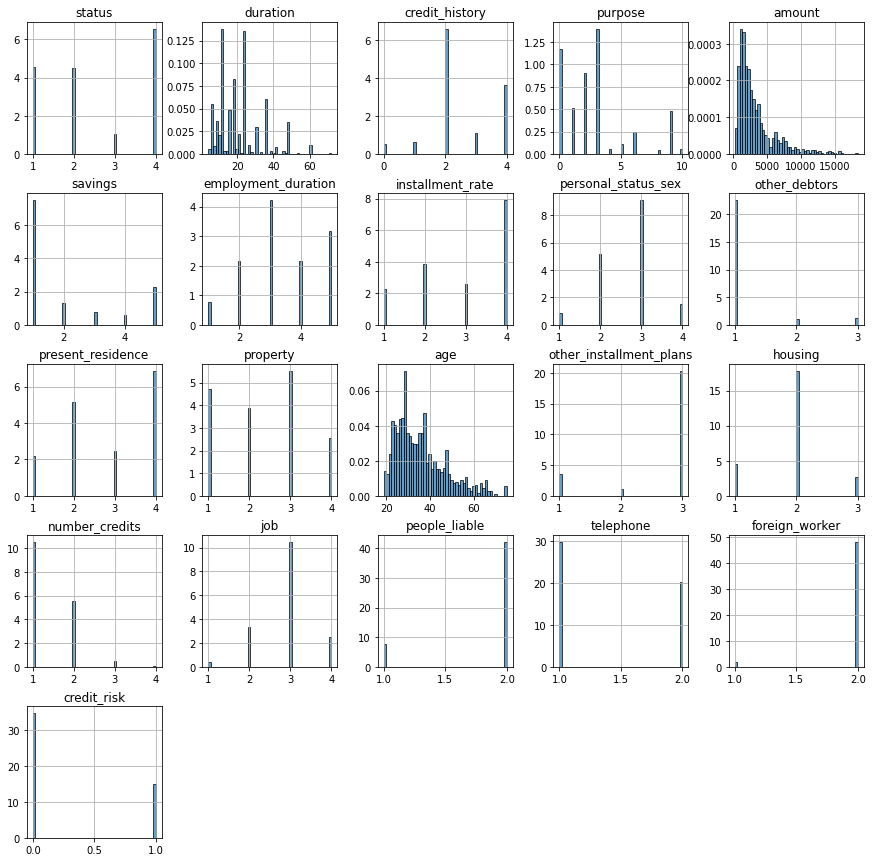

In [63]:
df.hist(figsize= (15,15), bins= 50, density = True, alpha = 0.7, edgecolor = 'black');

Se puede observar que sólo las variables `duration`, `amount` y `age`, toman un número considerable de valores. El resto de las variables sólo toma unos cuantos valores, haciendo sospechar que se puede tratar de variables cualitativas, no cuantitativas

### **Describe a continuación la información de cada variable: su descripción, el tipo de variable y para el caso de las categóricas, el total de niveles.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

### **3 Variables Numéricas reales o flotantes:**
*   **duration:** Se describen algunas estadísticas descriptivas en el siguiente chunk de código.
*   **amount:** Se describen algunas estadísticas descriptivas en el siguiente chunk de código.
*   **age:** Se describen algunas estadísticas descriptivas en el siguiente chunk de código.

In [64]:
variables_numericas = ['duration','amount','age']

df[variables_numericas].describe().T

,count,mean,std,min,25%,50%,75%,max
duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
amount,1000.0,3271.248,2822.751760,250.0,1365.5,2319.5,3972.25,18424.0
age,1000.0,35.542,11.352670,19.0,27.0,33.0,42.00,75.0


### **6 Variables de entrada Categóricas Nominales:**

El total de niveles se obtuvo con los códigos que aparecen debajo de este chunk de texto:

*   **credit_history (total de niveles):** 5
*   **purpose (total de niveles):** 10
*   **personal_status_sex (total de niveles):** 4
*   **other_debtors (total de niveles):** 3
*   **other_installment_plans (total de niveles):** 3
*   **housing (total de niveles):** 3

In [65]:
variables_nominales = ['credit_history','purpose','personal_status_sex','other_debtors',
                       'other_installment_plans','housing']

df[variables_nominales].nunique()

credit_history              5
purpose                    10
personal_status_sex         4
other_debtors               3
other_installment_plans     3
housing                     3
dtype: int64

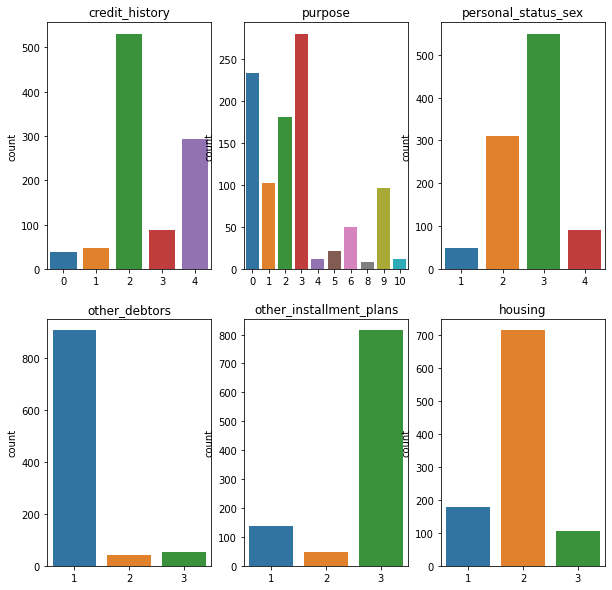

In [66]:
# Hacemos una gráfica para bocetar la frecuencia de cada clase

fig, axes = plt.subplots(2,3, figsize = (10,10))
axes = axes.ravel()
for col, ax in zip(df[variables_nominales], axes):
  sns.countplot(x = df[col], ax = ax)
  ax.set(title = f'{col}', xlabel = None)

### **4 Variables Categóricas Binarias (3 de entrada y 1 de salida):**

*   **people_liable:**
*   **telephone:**
*   **foreign_worker:**
*   **credit_risk:** (Variable de salida)

In [67]:
variables_binarias = ['people_liable', 'telephone', 'foreign_worker', 'credit_risk']

df[variables_binarias].nunique()

people_liable     2
telephone         2
foreign_worker    2
credit_risk       2
dtype: int64

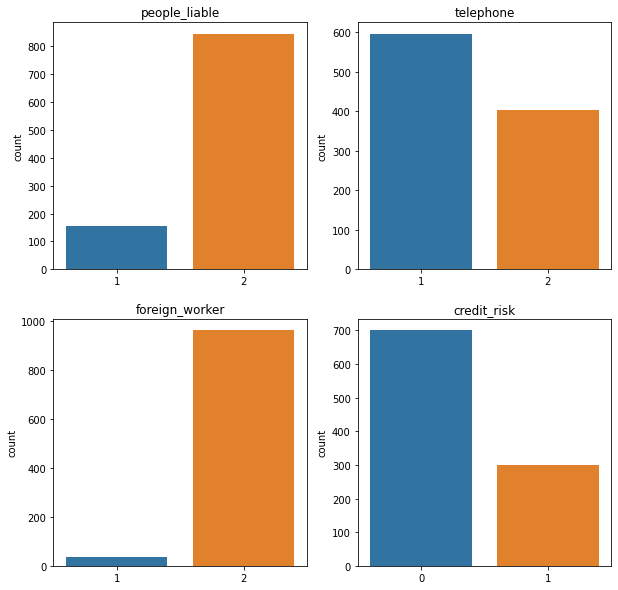

In [68]:
# Hacemos una gráfica para bocetar la frecuencia de cada clase

fig, axes = plt.subplots(2,2, figsize = (10,10))
axes = axes.ravel()
for col, ax in zip(df[variables_binarias], axes):
  sns.countplot(x = df[col], ax = ax)
  ax.set(title = f'{col}', xlabel = None)

### **5 Variables Categóricas Ordinales (Cuantitativas Discretas + Strings):**

#### NOTA: Estas variables están formadas por niveles que contienen intervalos numéricos y de texto.

El total de niveles se obtuvo con los códigos que aparecen debajo de este chunk de texto:

*   **status (total de niveles):** 4
*   **savings (total de niveles):** 5
*   **employment_duration (total de niveles):** 5
*   **property (total de niveles):** 4
*   **job (total de niveles):** 4

In [69]:
variables_ordinales = ['status', 'savings', 'employment_duration', 'property', 'job']

df[variables_ordinales].nunique()

status                 4
savings                5
employment_duration    5
property               4
job                    4
dtype: int64

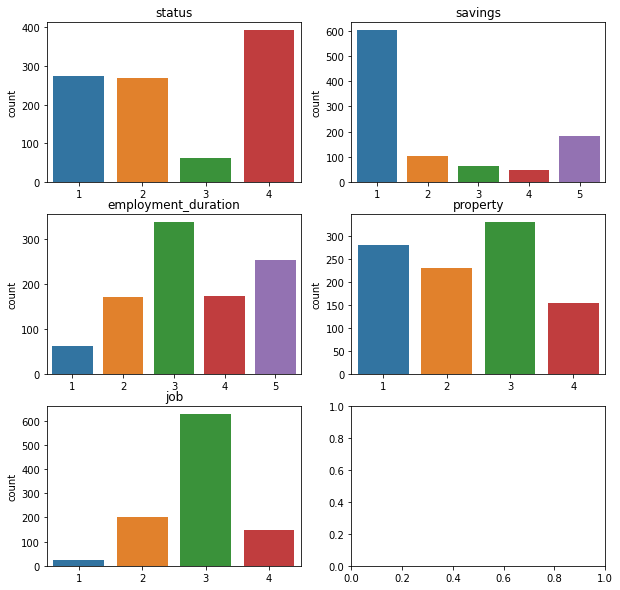

In [70]:
# Hacemos una gráfica para bocetar la frecuencia de cada clase

fig, axes = plt.subplots(3,2, figsize = (10,10))
axes = axes.ravel()
for col, ax in zip(df[variables_ordinales], axes):
  sns.countplot(x = df[col], ax = ax)
  ax.set(title = f'{col}', xlabel = None)

### **3 Variables Categóricas Ordinales:**
### NOTA: Estas categóricas ordinales están formadas solo por intervalos numéricos.

El total de niveles se obtuvo con los códigos que aparecen debajo de este chunk de texto:

*   **installment_rate (total de niveles):** 4
*   **present_residence (total de niveles):** 4
*   **number_credits (total de niveles):** 4

In [71]:
variables_ordinales2 = ['installment_rate', 'present_residence', 'number_credits']

df[variables_ordinales2].nunique()

installment_rate     4
present_residence    4
number_credits       4
dtype: int64

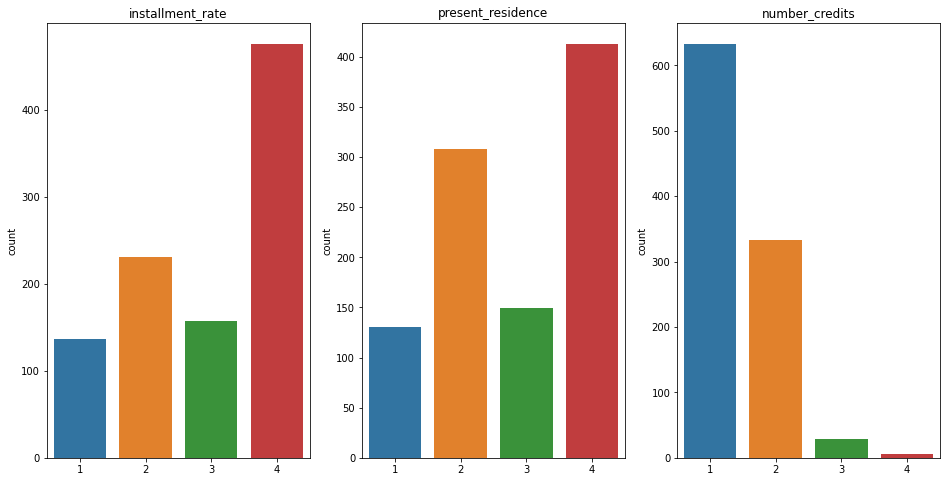

In [72]:
# Hacemos una gráfica para bocetar la frecuencia de cada clase

fig, axes = plt.subplots(1,3, figsize = (16,8))
axes = axes.ravel()
for col, ax in zip(df[variables_ordinales2], axes):
  sns.countplot(x = df[col], ax = ax)
  ax.set(title = f'{col}', xlabel = None)

## **Ejercicio 5**

### Análisis descriptivo de las variables usando el conjunto de entrenamiento.

### Incluye a continuación todo el código que consideres necesario para analizar las variables y decidir en dado caso qué transformaciones les estarías aplicando.

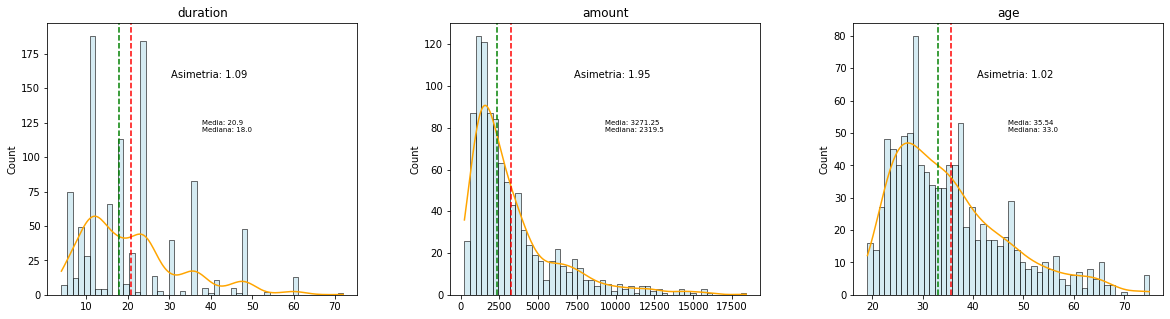

In [73]:
cols_de_interes = variables_numericas

fig, axes = plt.subplots(1,3, figsize=(20,5))
plt.subplots_adjust(wspace=0.3)
axes = axes.ravel()
for col, ax in zip(df[cols_de_interes], axes):
  sns.histplot(x=df[col], ax=ax, bins=50, kde=True,
               color="lightblue")
  ax.set(title=f'{col}', xlabel=None)
  ax.lines[0].set_color('orange')
  mean = round(df[col].mean(),2)
  ax.axvline(mean, color='red', linestyle='dashed', label="Media")
  median = round(df[col].median(),2)
  ax.axvline(median, color='green', linestyle='dashed', label="Mediana")
  ax.annotate('Media: {} \nMediana: {}'.format(mean, median),
              xy=(0.50, 0.60), xycoords='axes fraction',
              fontsize=7, ha='left')
  asim = round(df[col].skew(),2)
  ax.annotate('Asimetria: {}'.format(asim), xy=(0.40, 0.80), 
              xycoords='axes fraction', fontsize=10, ha='left')

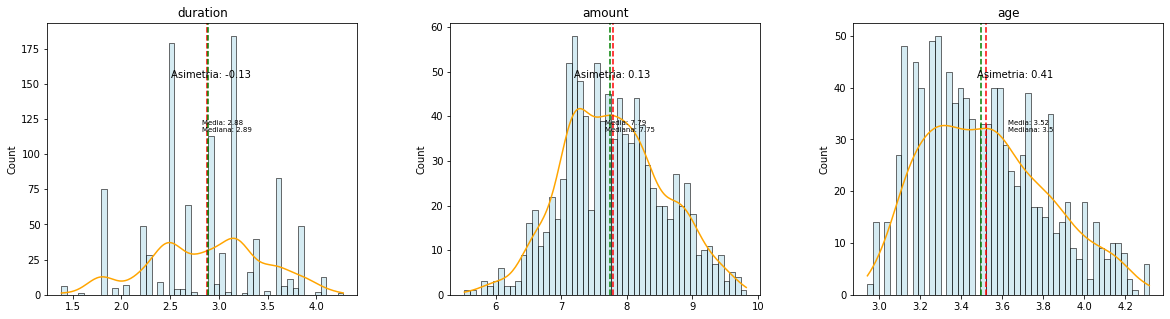

In [74]:
df_num_sqrt = df[variables_numericas].applymap(np.log)

cols_de_interes = variables_numericas

fig, axes = plt.subplots(1,3, figsize=(20,5))
plt.subplots_adjust(wspace=0.3)
axes = axes.ravel()
for col, ax in zip(df_num_sqrt[cols_de_interes], axes):
  sns.histplot(x=df_num_sqrt[col], ax=ax, bins=50, kde=True,
               color="lightblue")
  ax.set(title=f'{col}', xlabel=None)
  ax.lines[0].set_color('orange')
  mean = round(df_num_sqrt[col].mean(),2)
  ax.axvline(mean, color='red', linestyle='dashed', label="Media")
  median = round(df_num_sqrt[col].median(),2)
  ax.axvline(median, color='green', linestyle='dashed', label="Mediana")
  ax.annotate('Media: {} \nMediana: {}'.format(mean, median),
              xy=(0.50, 0.60), xycoords='axes fraction',
              fontsize=7, ha='left')
  asim = round(df_num_sqrt[col].skew(),2)
  ax.annotate('Asimetria: {}'.format(asim), xy=(0.40, 0.80), 
              xycoords='axes fraction', fontsize=10, ha='left')

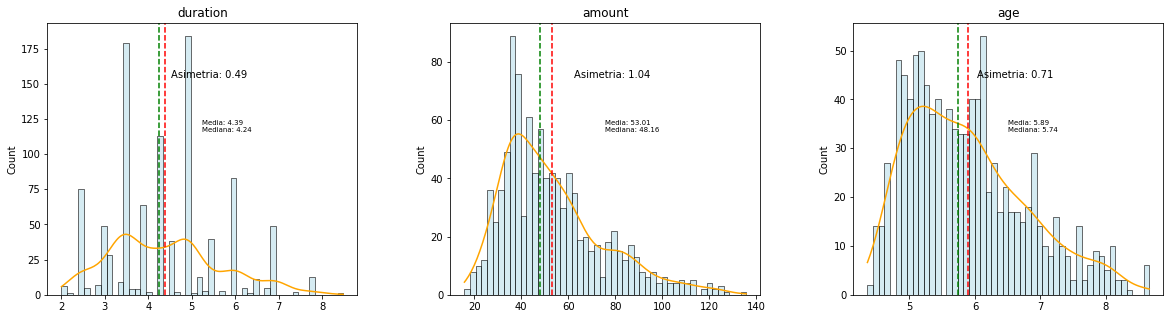

In [75]:
df_num_sqrt = df[variables_numericas].applymap(np.sqrt)

cols_de_interes = variables_numericas

fig, axes = plt.subplots(1,3, figsize=(20,5))
plt.subplots_adjust(wspace=0.3)
axes = axes.ravel()
for col, ax in zip(df_num_sqrt[cols_de_interes], axes):
  sns.histplot(x=df_num_sqrt[col], ax=ax, bins=50, kde=True,
               color="lightblue")
  ax.set(title=f'{col}', xlabel=None)
  ax.lines[0].set_color('orange')
  mean = round(df_num_sqrt[col].mean(),2)
  ax.axvline(mean, color='red', linestyle='dashed', label="Media")
  median = round(df_num_sqrt[col].median(),2)
  ax.axvline(median, color='green', linestyle='dashed', label="Mediana")
  ax.annotate('Media: {} \nMediana: {}'.format(mean, median),
              xy=(0.50, 0.60), xycoords='axes fraction',
              fontsize=7, ha='left')
  asim = round(df_num_sqrt[col].skew(),2)
  ax.annotate('Asimetria: {}'.format(asim), xy=(0.40, 0.80), 
              xycoords='axes fraction', fontsize=10, ha='left')

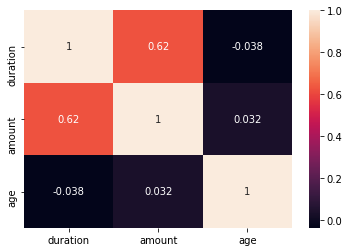

In [76]:
sns.heatmap(df[variables_numericas].corr(), annot=True);


### **Describe y explica a continuación las transformaciones que has decidido aplicar a cada columna:**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

None


### ++++++++ Termina la sección de agregar texto. +++++++++++


In [77]:
variables_numericas = ['duration', 'amount', 'age']

variables_categoricas = ['credit_history','purpose', 'personal_status_sex', 'other_debtors', 'property',
                        'other_installment_plans', 'housing', 'telephone', 'foreign_worker']

df[variables_categoricas] = df[variables_categoricas].astype(str)

variables_ordinales = ['status', 'savings', 'employment_duration', 'installment_rate', 'present_residence',
                      'number_credits', 'job', 'people_liable']

df[variables_ordinales] = df[variables_ordinales].astype("category")

In [78]:
df['status'] = df['status'].astype(CategoricalDtype(categories=[1,2,3,4], ordered=True))
df['savings'] = df['savings'].astype(CategoricalDtype(categories=[1,2,3,4,5], ordered=True))
df['employment_duration'] = df['employment_duration'].astype(CategoricalDtype(categories=[1,2,3,4,5], ordered=True))
df['installment_rate'] = df['installment_rate'].astype(CategoricalDtype(categories=[4,3,2,1], ordered=True))
df['present_residence'] = df['present_residence'].astype(CategoricalDtype(categories=[1,2,3,4], ordered=True))
df['number_credits'] = df['number_credits'].astype(CategoricalDtype(categories=[1,2,3,4], ordered=True))
df['job'] = df['job'].astype(CategoricalDtype(categories=[1,2,3,4], ordered=True))
df['people_liable'] = df['people_liable'].astype(CategoricalDtype(categories=[2,1], ordered=True))

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   status                   1000 non-null   category
 1   duration                 1000 non-null   int64   
 2   credit_history           1000 non-null   object  
 3   purpose                  1000 non-null   object  
 4   amount                   1000 non-null   int64   
 5   savings                  1000 non-null   category
 6   employment_duration      1000 non-null   category
 7   installment_rate         1000 non-null   category
 8   personal_status_sex      1000 non-null   object  
 9   other_debtors            1000 non-null   object  
 10  present_residence        1000 non-null   category
 11  property                 1000 non-null   object  
 12  age                      1000 non-null   int64   
 13  other_installment_plans  1000 non-null   object  
 14  housing  

In [80]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
amount,1000.0,3271.248,2822.751760,250.0,1365.5,2319.5,3972.25,18424.0
age,1000.0,35.542,11.352670,19.0,27.0,33.0,42.00,75.0
credit_risk,1000.0,0.300,0.458487,0.0,0.0,0.0,1.00,1.0


In [81]:
df.describe(include='object').T

,count,unique,top,freq
credit_history,1000,5,2,530
purpose,1000,10,3,280
personal_status_sex,1000,4,3,548
other_debtors,1000,3,1,907
property,1000,4,3,332
other_installment_plans,1000,3,3,814
housing,1000,3,2,714
telephone,1000,2,1,596
foreign_worker,1000,2,2,963


In [82]:
df.describe(include='category').T

,count,unique,top,freq
status,1000,4,4,394
savings,1000,5,1,603
employment_duration,1000,5,3,339
installment_rate,1000,4,4,476
present_residence,1000,4,4,413
number_credits,1000,4,1,633
job,1000,4,3,630
people_liable,1000,2,2,845


# **Parte II: Modelos de aprendizaje automático con los conjuntos originales de la partición realizada.**

## **Ejercicio 6**

Utiliza las clases `Pipeline()` y `ColumnTransformer()` de Sklearn para definir y conjuntar las siguientes transformaciones:

a. A las variables numéricas aplica las transformaciones que hayas decidido en el ejercicio 5.

b. A las variables nominales y binarias aplicar la transformación One-Hot-Encoding con k-1 niveles.

c. El resto de las variables dejarlas por el momento sin transformar.

In [83]:
variables_numericas = ['duration', 'amount', 'age']

variables_binarias = ['people_liable', 'telephone', 'foreign_worker', 'credit_risk']

variables_nominales = ['credit_history','purpose','personal_status_sex','other_debtors',
                       'other_installment_plans','housing']

# Se consruye el dataset de las POSIBLES variables predictoras
X = df.drop('credit_risk', axis = 1)

# Se consruye el dataset de la variable de salida
y = df['credit_risk']

# Particionamos 70% Train y 30% una temporal para volverla a dividir, para los datos de entrada y de salida, respectivamente, garantizando
# que dicha partición conserve la estratificación de las clases de la variable respuesta
Xtrain, Xtemp, ytrain, ytemp = train_test_split(X, y,
                                                train_size = 0.7,
                                                random_state = 1,
                                                stratify = y)

#Particionamos el 30% en 50% validación y 50% en test.
Xval, Xtest, yval, ytest = train_test_split(Xtemp, ytemp,
                                            train_size = 0.5,
                                            random_state = 1,
                                            stratify = ytemp)

In [84]:
# Transformaciones que se aplicarán a las variables numéricas usando la clase Pipeline de sklearn:

# ************* Inlcuye aquí tu código:*****************************

# Variables numéricas:
num_pipe = FunctionTransformer(np.log)
num_pipe_nombres = variables_numericas


# Variables categóricas-Nominales:

cat_pipe = catOHE_pipeline = Pipeline(
    steps=[
        ("encoderOHE", OneHotEncoder(drop='first', sparse=False,
                                     handle_unknown="ignore"))
    ]
)

# Todas las variables nominales y binarias excepto 'credit_risk'
cols_nomins = variables_binarias + variables_nominales
cols_expl_nomins = [x for x in cols_nomins if x not in set(['credit_risk'])]

cat_pipe_nombres = cols_expl_nomins


# Conjuntemos las transformaciones de todo tipo de variable y
# dejamos sin procesar aquellas que hayas decidido no transformar:

columnasTransformer = ColumnTransformer(
    transformers=[
        ("numer", num_pipe, num_pipe_nombres),
        ("nomin", cat_pipe, cat_pipe_nombres)     
    ], remainder = 'passthrough'
)

# *********** Aquí termina la sección de agregar código *************

columnasTransformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('numer',
                                 FunctionTransformer(func=<ufunc 'log'>),
                                 ['duration', 'amount', 'age']),
                                ('nomin',
                                 Pipeline(steps=[('encoderOHE',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['people_liable', 'telephone',
                                  'foreign_worker', 'credit_history', 'purpose',
                                  'personal_status_sex', 'other_debtors',
                                  'other_installment_plans', 'housing'])])

## **Ejercicio 7**

Como vamos a utilizar validación cruzada, concatena los conjuntos de entrenamiento y validación en un nuevo conjunto llamado trainval, que tendrá el mismo número de columnas, pero con el total de renglones la suma de ambos.

In [85]:
# Como se va a utilizar Validación-Cruzada, concatena los conjuntos de entrenamiento y validación
# en uno nuevo conjunto aumentado que llamaremos trainval para utilizar como entrenamiento:

# ************* Inlcuye aquí tu código:**************************

Xtrainval = pd.concat([Xtrain,Xval], axis = 0, ignore_index = True)
ytrainval = pd.concat([ytrain,yval], axis = 0, ignore_index = True)

Xtrainval.shape

# *********** Aquí termina la sección de agregar código *************

(850, 20)

In [86]:
# Veamos cuántas varaibles nuevas se introducen con las transformaciones One-Hot-Encoding:
Xtmp = Xtrainval.copy()
tmp = columnasTransformer.fit_transform(Xtmp)
print("Dimensión de las variables de entrada ANTES de las transformaciones:", Xtmp.shape)
print("Dimensión de las variables de entrada DESPUÉS de las transformaciones:", tmp.shape)

Dimensión de las variables de entrada ANTES de las transformaciones: (850, 20)
Dimensión de las variables de entrada DESPUÉS de las transformaciones: (850, 36)


## **Ejercicio 8**

En este ejercicio deberás encontrar los mejores hiperparámetros de cada modelo. Recuerda que debes buscar que no esté sobreentrenado (overfitting) o subentrenado (undefitting) cada uno de los modelos. En este ejercicio diremos que un modelo está sobreentrenado, si con respecto a la métrica de la exactitud (accuracy), la diferencia entre el conjunto de entrenamiento y el de validación es mayor al 3%.

In [87]:
# Definimos a continuación la función que llamamos "mis_modelos" que incluye
# todos los modelos que deseamos comparar en el ejercicio.

#Para saber si está sobre entrenado, el acuracy del train tiene que ser mayor que el de test.


def mis_modelos():
  modelos, nombres = list(), list()


  # ************* Inlcuye aquí tu código:**************************
  #
  # Deberás incluir en cada modelo los argumentos que consideres
  # adecuados para que cada uno converja y no esté sobreentrenado
  # con respecto a la métrica de la exatitud (accuracy).


  # Regresión Logística - Logistic Regression-LR:
  # https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

  modelos.append(LogisticRegression(max_iter=100,    # 10, 100, 1000
                                    C = 1.0,     # 0.000001, 0.005, 0.01,  1000
                                    #random_state=1
                                    ))

  nombres.append('LR')




  # k-Vecinos más Cercanos : k-Nearest-Neighbors-kNN:
  # https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

  modelos.append(KNeighborsClassifier(n_neighbors = 5 ))
  nombres.append('kNN')




  # Árbol de decisiones-DecisionTree-DT:
  # https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

  modelos.append(DecisionTreeClassifier(max_depth = 2 , criterion ='gini', min_samples_split = 3))
  nombres.append('DTree')




  # Bosque Aleatorio-RandomForest-RF:
  # https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

  #modelos.append(RandomForestClassifier(n_estimators = 10, criterion = 'gini', max_depth = 2, min_samples_split = 6, min_samples_leaf = 4, max_features = 'auto', max_leaf_nodes = 16, bootstrap =True, oob_score = True, verbose = 0, n_jobs = 1,
  #                                      max_samples = None, random_state = 19))
  #nombres.append('RF')


  modelos.append(RandomForestClassifier(max_depth = 2, criterion = 'gini', min_samples_split = 3))

  nombres.append('RF')


  #mimodelo2 = RandomForestClassifier(n_estimators=10,  # número de árboles en el Forest y después promedia por votación.
  #                                 criterion='gini',   # métrica para determinar las ramas. También puede ser: 'entropy', para la GananciaDeInformación (IG).
  #                                 max_depth=2, # Depth=k : máximo 2^k líneas/ramas.
  #                                 min_samples_split = 6,  # mínimo de puntos muestrales requeridos en un nodo para hacer la ramificación. Puede ser fracción de 0 a 1.
  #                                 min_samples_leaf = 4,  # mínimo de puntos muestrales que deben quedar en cada nueva ramificación (hojas). Puede ser fracción de 0 a 1.
  #                                 max_features= 'auto',   # número de características (features) que se consideran en cada ramificación: auto=sqrt(n_features).
  #                                 max_leaf_nodes=16,  # solo nos quedamos con las mejores k hojas.
  #                                 bootstrap=True,  # Cada Árbol se muestrea seleccionando la cantidad de datos del conjunto de entrenamiento, pero con reemplazo. False:los datos usados en cada árbol simpre es el mismo, el Train-set.
  #                                 oob_score=True,  # en caso de utilizar Out-of-bag samples.
  #                                 verbose=0,     # tipo de despliega de información durante el entrenamiento.
  #                                 n_jobs=-1,    # total de hilos a usar en las rutinas paralelizables: "-1" :usar todos los posibles.
  #                                 max_samples=None,   # Cuando se usa Boostrap, es el total de datos de Xtrain a usar en cada árbol. "None" usará Xtrain[0].
  #                                 random_state=19)





  # XGBoosting:
  # https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBClassifier
  # https://xgboost.readthedocs.io/en/stable/parameter.html

  modelos.append(XGBClassifier(booster = 'gbtree', n_estimators = 100, max_depth = 6, learning_rate = 0.3, objetive = 'binary:logistic', subsample = 1.0, n_jobs = -1))
  nombres.append('XGBoost')




  # Red neuronal de Perceptrón Multicapa-MLP:
  # https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

  modelos.append(MLPClassifier(hidden_layer_sizes=(30,),     # 100,  6, 24, 30, (15,15), (50,50)
                               activation='logistic',
                               max_iter=1000,                  # 200,
                               alpha=0.0001,               # término de regularización L2.
                               #learning_rate='constant',       # tasa de aprendizaje o tamaño de paso del método Gradiente Descendente.
                               #learning_rate_init=0.001,
                               #random_state=1
                               ))
  nombres.append('MLP')




  # Máquina de Vectores de Soporte-SVM:
  # https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

  modelos.append(SVC(kernel = 'rbf', C = 10, gamma = 'scale' ))
  nombres.append('SVM')


  # *********** Aquí termina la sección de agregar código *******************



  return modelos, nombres

Entrenamos cada uno de los modelos y desplegamos la métricas de Train y Val.

NOTA: Observa que el método de Validación-Cruzada llama  a los resultados de "validation" como "test":

In [88]:
modelos, nombres = mis_modelos()

Veamos cuáles son los modelos que se considerarán:

In [89]:
modelos

[LogisticRegression(),
 KNeighborsClassifier(),
 DecisionTreeClassifier(max_depth=2, min_samples_split=3),
 RandomForestClassifier(max_depth=2, min_samples_split=3),
 XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, gamma=None,
               gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.3, max_bin=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, n_estimators=100, n_jobs=-1,
               num_parallel_tree=None, objetive='binary:logistic',
               predictor=None, random_state=None, reg_alpha=None, ...),
 MLPClassifier(activation='logistic', hidden_layer_sizes=(30,), max_iter

Dichos modelos tienen los siguientes nombres/IDs

In [90]:
nombres

['LR', 'kNN', 'DTree', 'RF', 'XGBoost', 'MLP', 'SVM']

Ahora se ajustarán dichos modelos con los datos de entrenamientos y se evaluarán a partir de sus predicciones tanto en los datos de entrenamiento como en los de prueba

In [91]:
# Se crea una lista para guardar los resultados
resultados = list()

for i in range(len(modelos)):

  # Definimos nuestro pipeline con las transformaciones y los modelos:
  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])

  # Aplicaremos validación-cruzada:
  micv = RepeatedStratifiedKFold(n_splits=5,
                                 n_repeats=3,
                                 random_state=5     # agreguemos una semilla para estabilizar resultados.
                                 )
  dict_nombre = {'nombre': nombres[i]}

 # Definimos las métricas que desamos recuperar:
  mismetricas = {'accuracy','precision','recall','f1'}

  # Llevamos a cabo el entrenamiento:
  scores = cross_validate(pipeline,
                          Xtrainval,
                          ytrainval,
                          scoring=mismetricas,
                          cv=micv,
                          return_train_score=True,
                          )
  scores = {**dict_nombre, **scores}

  # Guardemos el resultado de cada modelo para análisis posteriores.
  resultados.append(scores)

  # Desplegamos los valores de las métricas para verificar si no hay
  # subentrenamiento o sobreentrenamiento:
  print('>> %s' % nombres[i])
  for j,k in enumerate(list(scores.keys())):
    if j>1:
      print('\t %s %.3f (%.3f)' % (k, np.mean(scores[k]),np.std(scores[k])))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

>> LR
	 score_time 0.020 (0.005)
	 test_accuracy 0.752 (0.021)
	 train_accuracy 0.777 (0.010)
	 test_f1 0.531 (0.042)
	 train_f1 0.574 (0.022)
	 test_precision 0.617 (0.052)
	 train_precision 0.673 (0.020)
	 test_recall 0.469 (0.056)
	 train_recall 0.501 (0.025)
>> kNN
	 score_time 0.038 (0.009)
	 test_accuracy 0.720 (0.028)
	 train_accuracy 0.814 (0.008)
	 test_f1 0.474 (0.054)
	 train_f1 0.651 (0.016)
	 test_precision 0.546 (0.065)
	 train_precision 0.745 (0.021)
	 test_recall 0.424 (0.068)
	 train_recall 0.578 (0.018)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Fram

>> DTree
	 score_time 0.021 (0.005)
	 test_accuracy 0.689 (0.015)
	 train_accuracy 0.712 (0.014)
	 test_f1 0.136 (0.182)
	 train_f1 0.184 (0.219)
	 test_precision 0.184 (0.206)
	 train_precision 0.295 (0.324)
	 test_recall 0.124 (0.187)
	 train_recall 0.160 (0.215)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Fram

>> RF
	 score_time 0.038 (0.006)
	 test_accuracy 0.700 (0.002)
	 train_accuracy 0.701 (0.001)
	 test_f1 0.003 (0.010)
	 train_f1 0.006 (0.010)
	 test_precision 0.067 (0.249)
	 train_precision 0.317 (0.452)
	 test_recall 0.001 (0.005)
	 train_recall 0.003 (0.005)
[06:14:48] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "objetive" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:14:48] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "objetive" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  the

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10

>> MLP
	 score_time 0.025 (0.014)
	 test_accuracy 0.737 (0.027)
	 train_accuracy 0.806 (0.018)
	 test_f1 0.511 (0.054)
	 train_f1 0.637 (0.035)
	 test_precision 0.580 (0.060)
	 train_precision 0.724 (0.039)
	 test_recall 0.460 (0.065)
	 train_recall 0.569 (0.038)
>> SVM
	 score_time 0.033 (0.007)
	 test_accuracy 0.744 (0.020)
	 train_accuracy 0.802 (0.006)
	 test_f1 0.497 (0.051)
	 train_f1 0.609 (0.025)
	 test_precision 0.608 (0.047)
	 train_precision 0.748 (0.019)
	 test_recall 0.425 (0.068)
	 train_recall 0.516 (0.041)


Pondremos en orden los resultados obtenidos en las iteraciones de cada fold (del k-fold cross-validation)

In [92]:
df_resultados = pd.DataFrame()

for i in range(len(modelos)):
    tabla_result = pd.DataFrame.from_dict(resultados[i]).mean()
    tabla_result = tabla_result.to_frame(name = resultados[i]['nombre'])
    df_resultados = pd.concat([df_resultados, tabla_result], axis = 1)

In [93]:
df_resultados.T

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_precision,train_precision,test_recall,train_recall
LR,0.079726,0.020421,0.752157,0.777353,0.530836,0.574092,0.617032,0.673260,0.469281,0.500654
kNN,0.031888,0.038426,0.719608,0.813824,0.473836,0.650546,0.546237,0.744793,0.423529,0.577778
DTree,0.026704,0.020726,0.689020,0.711667,0.135704,0.184183,0.184115,0.295423,0.124183,0.160131
RF,0.257359,0.037769,0.700000,0.700882,0.002564,0.006451,0.066667,0.316667,0.001307,0.003268
XGBoost,0.256478,0.033287,0.727843,1.000000,0.501089,1.000000,0.567527,1.000000,0.454902,1.000000
MLP,3.605668,0.024898,0.737255,0.805588,0.511256,0.636861,0.579978,0.724495,0.460131,0.568954
SVM,0.046065,0.033150,0.744314,0.802255,0.496761,0.609332,0.607948,0.747940,0.424837,0.516013


In [94]:
df_metrica_recall = pd.DataFrame()

for i in range(len(modelos)):
    tabla_result = pd.DataFrame.from_dict(resultados[i])['test_recall']
    tabla_result = tabla_result.to_frame(name = resultados[i]['nombre'])
    df_metrica_recall = pd.concat([df_metrica_recall, tabla_result], axis = 1)

In [95]:
df_metrica_recall

,LR,kNN,DTree,RF,XGBoost,MLP,SVM
0,0.431373,0.392157,0.627451,0.000000,0.509804,0.431373,0.372549
1,0.509804,0.470588,0.000000,0.000000,0.392157,0.450980,0.431373
2,0.490196,0.372549,0.000000,0.000000,0.470588,0.490196,0.450980
3,0.450980,0.313725,0.058824,0.000000,0.450980,0.352941,0.392157
4,0.392157,0.529412,0.333333,0.000000,0.431373,0.470588,0.411765
5,0.450980,0.431373,0.000000,0.000000,0.450980,0.450980,0.431373
6,0.431373,0.352941,0.156863,0.000000,0.450980,0.431373,0.313725
7,0.470588,0.392157,0.333333,0.019608,0.529412,0.490196,0.450980
8,0.470588,0.450980,0.000000,0.000000,0.431373,0.470588,0.529412
9,0.509804,0.372549,0.000000,0.000000,0.392157,0.509804,0.431373


In [96]:
df_melted = pd.melt(df_metrica_recall)

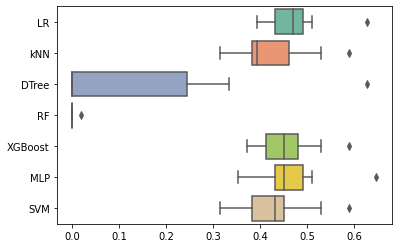

In [97]:
sns.boxplot(y='variable', x='value', data=df_melted, palette="Set2").set(xlabel='', ylabel='');

## **Ejercicio 9**

### **De acuerdo a la información de la matriz de costo dada en la documentación del problema, contesta las siguientes preguntas:**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

a.   ¿Qué error se considera más costoso por parte del banco? ¿FP o FN? Justifica tu respuesta.

None

b.   ¿Cuál o cuáles serían entonces las métricas a considerar como más importantes? Justifica tu respuesta.

None



### ++++++++ Termina la sección de agregar texto. +++++++++++


## **Ejercicio 10**

In [98]:
# Obtener un diagrama de caja y bigotes (boxplot) múltiple de todos los modelos,
# utilizando los resultados obtenidos con la métrica que consideraste más importante
# en el ejercicio anterior:


# ************* Inlcuye aquí tu código:**************************

None


# *********** Aquí termina la sección de agregar código *************


### **Incluye tus conclusiones al respecto, en particular indica cuáles consideras son los mejores modelos obtenidos.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

None

### ++++++++ Termina la sección de agregar texto: +++++++++++



# **Parte III: Modelos con técnicas para clases no balanceadas.**

## **Ejercicio 11**

In [99]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

over = SMOTE()
under = RandomUnderSampler()

Veamos como se ve el pipeline con los pasos de sobre-muestre y submuestreo:

In [100]:
i = 3
pipeline = Pipeline(steps=[('over', over), ('under', under),('ct',columnasTransformer),('m',modelos[i])])
pipeline

Pipeline(steps=[('over', SMOTE()), ('under', RandomUnderSampler()),
                ('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numer',
                                                  FunctionTransformer(func=<ufunc 'log'>),
                                                  ['duration', 'amount',
                                                   'age']),
                                                 ('nomin',
                                                  Pipeline(steps=[('encoderOHE',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['people_liable', 'telephone',
                                                   'foreign_worker',
                                                   'credit_history', 'purpose',
                                                   'personal_status_sex',
                                                   'other_debtors',
                                                   'other_installment_plans',
                                                   'housing'])])),
                ('m',
                 RandomForestClassifier(max_depth=2, min_samples_split=3))])

Al parecer, todo funciona bien. Ahora sí se hará la ejecución del ajuste de todos los modelos en consideración pero ya con el sobremuestreo y submuestreo en el pipeline

In [101]:
# Selecciona una técnica de sobremuestreo y/o submuestreo
# para clases no balanceadas que consideres adecuada.


# ************* Inlcuye aquí tu código:**************************

# Se crea una lista para guardar los resultados
resultados = list()

for i in range(len(modelos)):

  # Definimos nuestro pipeline con las transformaciones y los modelos:
  pipeline = Pipeline(steps=[('under', under),('ct',columnasTransformer),('m',modelos[i])])

  # Aplicaremos validación-cruzada:
  micv = RepeatedStratifiedKFold(n_splits=5,
                                 n_repeats=3,
                                 random_state=5     # agreguemos una semilla para estabilizar resultados.
                                 )
  dict_nombre = {'nombre': nombres[i]}

 # Definimos las métricas que desamos recuperar:
  mismetricas = {'accuracy','precision','recall','f1'}

  # Llevamos a cabo el entrenamiento:
  scores = cross_validate(pipeline,
                          Xtrainval,
                          ytrainval,
                          scoring=mismetricas,
                          cv=micv,
                          return_train_score=True,
                          )
  scores = {**dict_nombre, **scores}

  # Guardemos el resultado de cada modelo para análisis posteriores.
  resultados.append(scores)

  # Desplegamos los valores de las métricas para verificar si no hay
  # subentrenamiento o sobreentrenamiento:
  print('>> %s' % nombres[i])
  for j,k in enumerate(list(scores.keys())):
    if j>1:
      print('\t %s %.3f (%.3f)' % (k, np.mean(scores[k]),np.std(scores[k])))


# *********** Aquí termina la sección de agregar código *************


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

>> LR
	 score_time 0.020 (0.004)
	 test_accuracy 0.687 (0.036)
	 train_accuracy 0.726 (0.012)
	 test_f1 0.572 (0.042)
	 train_f1 0.623 (0.014)
	 test_precision 0.487 (0.039)
	 train_precision 0.531 (0.014)
	 test_recall 0.698 (0.065)
	 train_recall 0.753 (0.020)
>> kNN
	 score_time 0.038 (0.003)
	 test_accuracy 0.667 (0.036)
	 train_accuracy 0.726 (0.015)
	 test_f1 0.550 (0.034)
	 train_f1 0.626 (0.015)
	 test_precision 0.465 (0.038)
	 train_precision 0.530 (0.018)
	 test_recall 0.678 (0.051)
	 train_recall 0.765 (0.020)
>> DTree
	 score_time 0.018 (0.003)
	 test_accuracy 0.625 (0.044)
	 train_accuracy 0.661 (0.027)
	 test_f1 0.530 (0.052)
	 train_f1 0.574 (0.009)
	 test_precision 0.426 (0.041)
	 train_precision 0.463 (0.023)
	 test_recall 0.708 (0.103)
	 train_recall 0.761 (0.055)
>> RF
	 score_time 0.034 (0.003)
	 test_accuracy 0.668 (0.039)
	 train_accuracy 0.698 (0.016)
	 test_f1 0.571 (0.043)
	 train_f1 0.611 (0.013)
	 test_precision 0.468 (0.040)
	 train_precision 0.499 (0.017)
	

## **Ejercicio 12**

In [102]:
df_resultados = pd.DataFrame()

for i in range(len(modelos)):
    tabla_result = pd.DataFrame.from_dict(resultados[i]).mean()
    tabla_result = tabla_result.to_frame(name = resultados[i]['nombre'])
    df_resultados = pd.concat([df_resultados, tabla_result], axis = 1)

In [103]:
df_resultados.T

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_precision,train_precision,test_recall,train_recall
LR,0.112979,0.019985,0.687059,0.726176,0.572285,0.622747,0.486943,0.530996,0.698039,0.753268
kNN,0.057488,0.037701,0.666667,0.725784,0.550325,0.626263,0.464826,0.530309,0.678431,0.765359
DTree,0.042690,0.018238,0.625098,0.660980,0.529973,0.574138,0.426377,0.463325,0.708497,0.761438
RF,0.237308,0.033827,0.668235,0.698039,0.570702,0.610979,0.468190,0.498539,0.734641,0.789869
XGBoost,0.213884,0.026182,0.668627,0.872843,0.549555,0.825389,0.466198,0.702949,0.673203,1.000000
MLP,0.696020,0.017846,0.702745,0.723725,0.585938,0.618963,0.507193,0.530275,0.701961,0.747712
SVM,0.048144,0.028155,0.686667,0.742647,0.574967,0.651061,0.486283,0.549056,0.705882,0.800327


In [104]:
df_metrica_accuracy = pd.DataFrame()

for i in range(len(modelos)):
    tabla_result = pd.DataFrame.from_dict(resultados[i])['test_accuracy']
    tabla_result = tabla_result.to_frame(name = resultados[i]['nombre'])
    df_metrica_accuracy = pd.concat([df_metrica_accuracy, tabla_result], axis = 1)

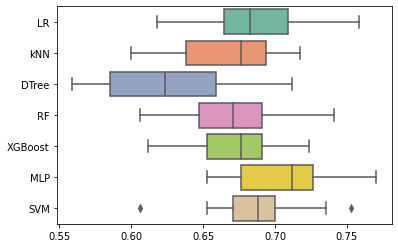

In [105]:
# Obtener un diagrama de caja y bigotes (boxplot) múltiple de todos los modelos,
# que incluye submuestreo y/o sobremuestreo:


# ************* Inlcuye aquí tu código:**************************

df_melted = pd.melt(df_metrica_accuracy)
sns.boxplot(y='variable', x='value', data=df_melted, palette="Set2").set(xlabel='', ylabel='');


# *********** Aquí termina la sección de agregar código *************

# **Parte IV: Mejor modelo**

## **Ejercicio 13**

### **Selecciona y justifica cuál consideras es el mejor modelo que has obtenido hasta ahora.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

None

### ++++++++ Termina la sección de agregar texto. +++++++++++


## **Ejercicio 14**

In [106]:
# Incluye aquí tu mejor modelo. Verifica que tu modelo no esté sobreentrenado
# e indica cuáles son los mejores valores obtenidos de los hiperparámetros.


# Con el mejor modelo y los mejores hiperparámetros encontrados en el ejercicio anterior,
# utiliza ahora (por primera vez en la actividad) el conjunto de prueba (test set) para:

# a.	Mejor modelo con los mejores hiperparámetros y el conjunto de prueba.


# ************* Inlcuye aquí tu código:**************************

None

# *********** Aquí termina la sección de agregar código *************


In [107]:
# b.	Obtener la matriz de confusión y el classification_report().

# ************* Inlcuye aquí tu código:**************************

None


# *********** Aquí termina la sección de agregar código *************

In [108]:
# c.	Realiza un análisis de importancia de variables (feature importance) de este
#     mejor modelo e incluye tus conclusiones al respecto.

# ************* Inlcuye aquí tu código:**************************

None


# *********** Aquí termina la sección de agregar código *************


### ++++++++ Inicia la sección de agregar texto: +++++++++++

None

### ++++++++ Termina la sección de agregar texto. +++++++++++

## **Ejercicio 15**

### **Escribe tus conclusiones finales de la actividad.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

None


### ++++++++ Termina la sección de agregar texto. +++++++++++


>> ### **Fin de la Actividad de las Semanas 5 y 6.**